In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\datafiles\50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df['RDSpend'].fillna(value=df['RDSpend'].mean(),inplace=True)

df['MarketingSpend'].fillna(value=df['MarketingSpend'].mean(), inplace=True)

In [4]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(50, 4) (50,)


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
ct = ColumnTransformer(
        [('ohe', OneHotEncoder(),[3])],
        remainder = 'passthrough'
        )

In [9]:
X = ct.fit_transform(X)

In [10]:
X.shape

(50, 6)

In [11]:
from sklearn.linear_model import LassoCV

In [13]:
model = LassoCV()
model.fit(X,y).score(X,y)

0.7970081704680899

In [14]:
model.coef_

array([-0.        ,  0.        ,  0.        ,  0.69424795,  0.01606084,
        0.07192959])

In [15]:
imp_coef=pd.Series(model.coef_, index = ['Cal', 'Fl', 'NY', "RD", 'AD', 'MExp'])

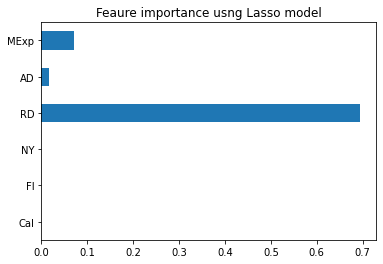

In [18]:
imp_coef.plot(kind='barh')
plt.title('Feaure importance usng Lasso model')
plt.show()

In [19]:
from sklearn.linear_model import RidgeCV, ElasticNetCV

In [20]:
model = RidgeCV()
model.fit(X,y).score(X,y)

0.8014231367603463

In [21]:
model = ElasticNetCV()
model.fit(X,y).score(X,y)

0.7970028350244669